In [10]:
import os
import cv2
import numpy as np
import pandas as pd
import easyocr
import matplotlib.pyplot as plt

In [2]:
data_dir = "../../data/test_aadhar"

In [402]:
img =  cv2.cvtColor(cv2.imread(os.path.join(data_dir,"kashi_aadhar.jpg")), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [403]:
blured_gray =  cv2.GaussianBlur(img_gray, (5, 5), 1)

In [404]:
img.shape

(1599, 899, 3)

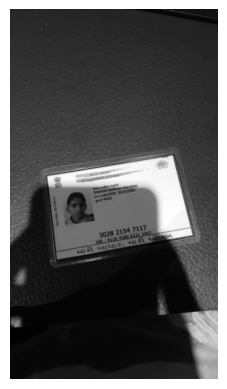

In [405]:
plt.imshow(blured_gray,cmap="gray")
plt.axis("off")
plt.show()

In [433]:
# apply binary thresholding
ret, thresh = cv2.threshold(blured_gray, 100, 255, cv2.THRESH_BINARY)

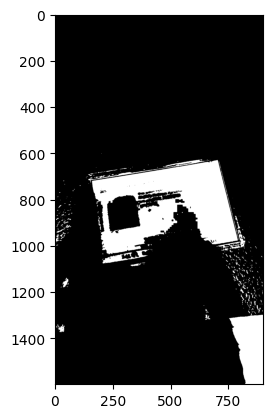

In [434]:
plt.imshow( thresh,cmap='gray')

In [422]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      

         
print("Number of contours detected:", len(contours))

Number of contours detected: 482


In [423]:
valid_cnt = []
valid_xywh = []
for cnt in contours:
    x1,y1 = cnt[0][0]
    approx = cv2.approxPolyDP(cnt, 0.04*cv2.arcLength(cnt, True), True)       
    if len(approx) == 4 :
        # x, y, w, h = cv2.boundingRect(cnt) 

        area = cv2.contourArea(cnt)     

        if (area > img.shape[0]* img.shape[1]*0.01) and (area < img.shape[0]* img.shape[1]*0.5):
            valid_cnt.append(cnt) 
            valid_xywh.append(approx)
            
                       

    

In [424]:
valid_xywh

[array([[[ 752, 1315]],
 
        [[ 822, 1597]],
 
        [[ 898, 1598]],
 
        [[ 898, 1300]]], dtype=int32)]

In [425]:
len(valid_cnt)

1

In [426]:
# draw contours on the original image
image_copy = img.copy()
_ =cv2.drawContours(image=image_copy, contours=valid_cnt, contourIdx=-1, color=(255,0 , 0), thickness=2, lineType=cv2.LINE_AA)

In [427]:
valid_cnt[0]

array([[[ 847, 1294]],

       [[ 847, 1295]],

       [[ 847, 1296]],

       ...,

       [[ 850, 1296]],

       [[ 849, 1295]],

       [[ 848, 1294]]], dtype=int32)

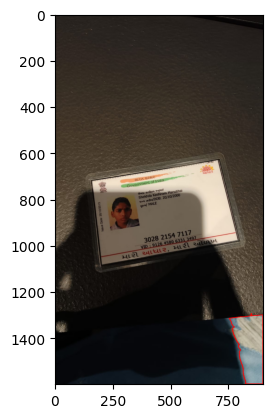

In [428]:
plt.imshow( image_copy,cmap='gray')